<hr style="border-top: 
           6px solid #000;  
           margin-bottom: 0px">
<div style="font-size:22px; 
            font-weight:700; 
            margin-bottom: -6px; 
            margin-top:0px; 
            background:rgba(40,67,135,1); 
            padding:2px 18px 5px 18px;
            border-top:5px solid blue; 
            border-bottom-left-radius:20px; 
            border-bottom-right-radius:20px; 
            color:white; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Capstone</div>
<div>&nbsp;</div>


<div style="color:#333"><i>By</i>: <b>Peter Anyaduba</b> for UCBerkely BH-PCMLAI: Professional Certificate in Machine Learning and Artificial Intelligence</div>

<div style="font-size:16px; 
            font-weight:700; 
            margin-bottom: -6px; 
            margin-top:25px; 
            background:rgba(45,85,255,0.18); 
            padding:8px;
            border-bottom:3px solid #000000; 
            border-top-left-radius:15px; 
            border-top-right-radius:15px;">Project Topic: Credit Card Fraud Detection</div>

### **Problem Statement**
<hr style="border-top: 1px solid #cc98cc;">

<div style="font-weight:bold;">Provide a financial institution with an algorithm to identify fraudulent credit card transactions in real time.</div>


#### **Data Source: Provided By [Machine Learning Group](http://mlg.ulb.ac.be)**
<hr style="border-top: 1px solid #cc98cc;">

[Data Source Site](https://data.world/raghu543/credit-card-fraud-data):
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### **Modeling Techniques to be used**
<hr style="border-top: 1px solid #cc98cc;">

Modelling techniques suggested to be used include:
- Imbalance Classes
- Categorical Features
- Clustering and Classification for fraud detection
- Sequential Modelling
- Performance Measures

#### **Expected results**
<hr style="border-top: 1px solid #cc98cc; ">

Develop a model to detect credit card fraud in real time

#### **Why this question is important**
<hr style="border-top: 1px solid #cc98cc;">

Why this is important:
- A credit card fraud detection algorithm will enable a bank to lower the risk of loss of funds for its customers.
- It will also enable the bank to improve on its public image and reputation.


### **Important Summary**
<hr style="border-top: 2px solid #000; margin-top:3px; ">

- The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
- The dataset presents transactions that occurred in two days 
- There were 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, 
- The positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation. 
- Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
- Features V1, V2, to V28 are the principal components obtained with PCA 
- The only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
- Given the class imbalance ratio, Measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC) is recommended
- Confusion matrix accuracy is not meaningful for unbalanced classification.

#### **Proprietary Information**
<hr style="border-top: 1px solid #cc98cc; margin-top:5px;  margin-bottom: 0px;">

<div style="font-size:13px;font-family:'Arial'; font-weight:400">The proprietary information has been provided by the source: <span style="font-size:14px;font-family:'Times New Roman'; font-style:italic;">Machine Learning Group of Université Libre de Bruxelles</span></div>

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015


### **Analysis**
<hr style="border-top: 1px solid #000;">

A detailed analysis of the credic card data!

In [769]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score,average_precision_score, roc_curve, recall_score
import itertools
from matplotlib.font_manager import FontProperties
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.multiclass import OneVsOneClassifier

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)

In [770]:
cc = pd.read_csv('data/creditcard.csv')

In [771]:
cc = cc

In [772]:
cc.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Get information about the dataset</div>

In [773]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Check for missing values</div>

In [774]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<div style="color:#fff; 
            font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:green; 
            padding:8px 25px 6px 25px;
            border-top-left-radius:25px; 
            border-top-right-radius:25px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black; 
            -moz-box-shadow: 0 8px 6px -6px black; 
            box-shadow: 0 8px 6px -6px black;">
    <div style="font-size:18px">Exploratory Data Analysis</div>
    <div style="margin-top:0px">Evaluate the nature of Data</div>
</div>

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-bottom-left-radius:12px; 
            border-bottom-right-radius:12px; 
            border-top:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Plot the distribution of the dataset</div>

Text(0.5, 1.0, 'Count of the Categories of the Class feature')

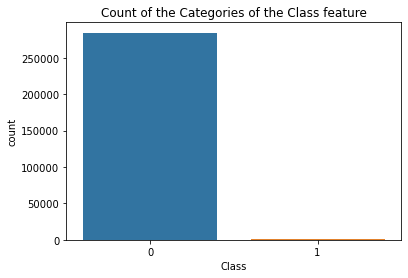

In [775]:
sns.countplot(cc['Class'])
plt.title("Count of the Categories of the Class feature")

### [Class Imbalance:](#) From the plot above, it can be seen that the dataset is highly imbalanced

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:10px; 
            border-top-right-radius:10px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Visualize the dataset - To reduce the time for visualization, we choose to visualize only 8 columns</div>

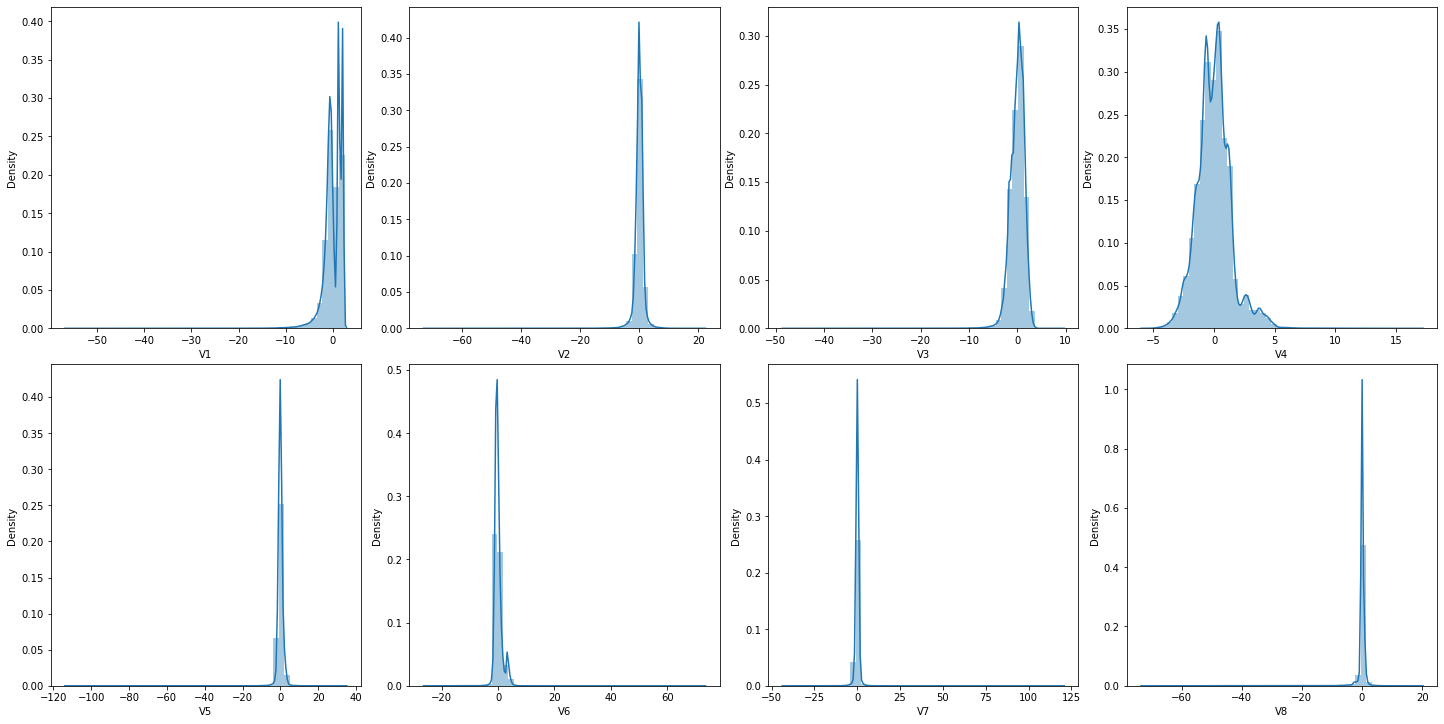

In [776]:
df_temp = cc.drop(columns=['Time', 'Amount', 'Class'])
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()


for col in df_temp.columns:
    
    if index < 8:
        sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

From the visualization above, the dataset can be seen to be evenly distributed around 0

<AxesSubplot:xlabel='Time', ylabel='Density'>

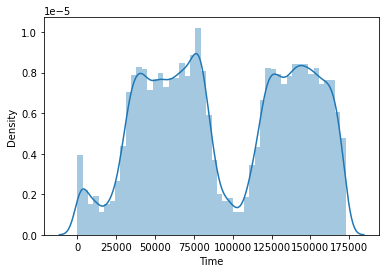

In [777]:
sns.distplot(cc['Time'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

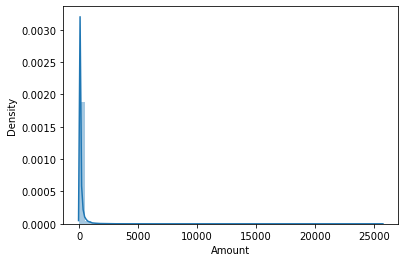

In [778]:
sns.distplot(cc['Amount'])

<AxesSubplot:>

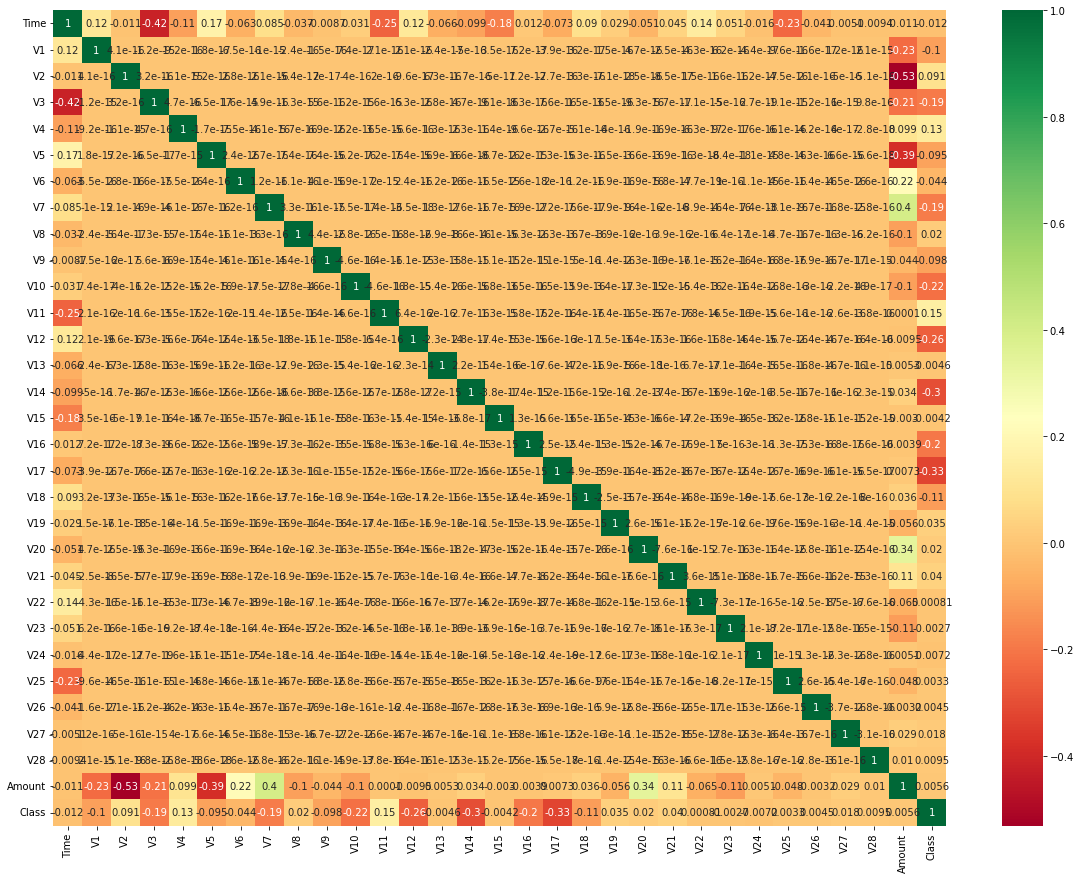

In [779]:
corr = cc.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="RdYlGn")

In [780]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


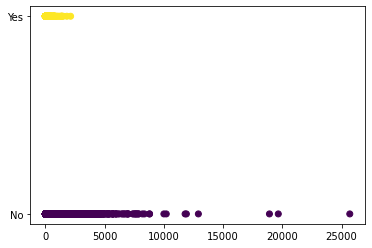

In [781]:
plt.scatter(cc[['Amount']], cc['Class'], c = cc['Class'])
plt.yticks([0, 1], ['No', 'Yes']);

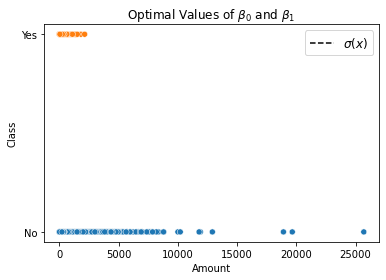

In [782]:
def sigmoid(x, beta_0, beta_1):
    return 1/(1 + np.exp(-(beta_0 + beta_1*x)))

x = np.array([-1, 0, 1])
clf = LogisticRegression().fit(cc[['Amount']], cc['Class'])
beta_0 = float(clf.intercept_)
beta_1 = float(clf.coef_)
         
#plt.scatter(cc[['Amount']], cc['Class'], c = cc['Class'])
sns.scatterplot(data = cc, x = cc['Amount'], y = cc['Class'], hue = cc['Class'], legend = False)
plt.yticks([0, 1], ['No', 'Yes'])
plt.plot(x, sigmoid(x, beta_0, beta_1), '--', color = 'black', label = r'$\sigma(x)$')
plt.legend(fontsize = 12)
plt.title(r'Optimal Values of $\beta_0$ and $\beta_1$');


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Distribution of legitimate and fraudulent transactions</div>

In [783]:
cc.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### **Categories of Transactions on the feature: Class**
<hr style="border-top: 1px solid #cc98cc;">
The analysis of the categories of data on the feature Class shows the following data
- Normal Transactions: 284,315
- Fraudulent Transactions: 492
- Dataset is highly imbalanced

<hr style="border-top: 1px solid #cc98cc;">

The representation of transactions are as follows
- 0 = Represents Legitimate Transactions: 284315
- 1 = Represents Fruadulent Transactions: 492

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Separate the data for analysis</div>

In [784]:
legitimate = cc[cc.Class == 0]
fraudulent = cc[cc.Class == 1]
print(legitimate.shape)
print(fraudulent.shape)

(284315, 31)
(492, 31)


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Statistical Measures of the Legitimate Transactions</div>

In [785]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Statistical Measures of the Fraudulent Transactions</div>

In [786]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Compare the values for both transactions</div>

In [787]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Comparing Fraudulent and Normal Transactions (Histograms)</div>

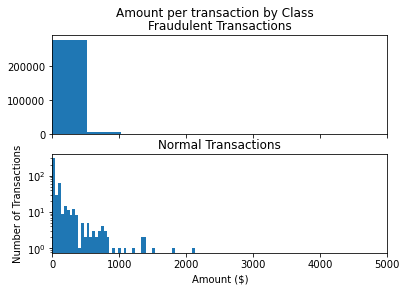

In [788]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')
bins = 50
ax1.hist(legitimate.Amount, bins = bins)
ax1.set_title('Fraudulent Transactions')
ax2.hist(fraudulent.Amount, bins = bins)
ax2.set_title('Normal Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0, 5000)
plt.yscale('log')
plt.show();

The plot above shows that most fraudulent transactions tend to be of less than $1000.

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Comparing Fraudulent and Normal Transactions (Scatter Plot)</div>

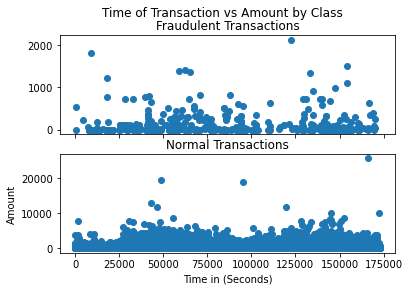

In [789]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')
bins = 50
ax1.scatter(fraudulent.Time, fraudulent.Amount)
ax1.set_title('Fraudulent Transactions')
ax2.scatter(legitimate.Time, legitimate.Amount)
ax2.set_title('Normal Transactions')
plt.xlabel('Time in (Seconds)')
plt.ylabel('Amount')
plt.show();

The plot above shows that most fraudulent transactions tend to be of less than $1000.

<div style="color:#fff;
            font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:green; 
            padding:12px 25px 6px 25px;
            border-top-left-radius:30px; 
            border-top-right-radius:30px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
            box-shadow: 0 8px 6px -6px black;">
    <div style="font-size:18px;
                font-weight:bold;"><b>Handle Imbalanced Data - Under-Sampling</b></div>
    <div style="margin-top:0px">Build an under-sampled dataset with similar distribution of legitimate and fraudulent transactions<br />
        Number of Fraudulent Transactions - 492
    </div>
</div>

In [790]:
legitimate_sample = legitimate.sample(n=492)

In [791]:
legitimate_sample.shape

(492, 31)

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Concatenate the under-sampled dataframe with the fraudulent transactions</div>

In [792]:
new_df = pd.concat([legitimate_sample, fraudulent], axis=0)

In [793]:
new_df.shape

(984, 31)

In [794]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9143,13000.0,-1.775629,0.147855,2.874313,4.890627,0.566314,0.873777,-0.135343,-0.077841,0.192946,...,-0.240293,0.453271,0.504867,-0.154706,0.289510,0.492946,0.123951,-0.078302,57.49,0
93633,64518.0,1.157747,0.117075,0.579719,0.508795,-0.381375,-0.326487,-0.147698,0.095616,-0.155660,...,-0.169987,-0.521988,0.184073,0.205064,0.069795,0.095786,-0.019609,0.006566,2.69,0
235291,148332.0,-2.568538,1.123661,0.748339,2.488169,0.313032,2.121386,-1.397102,-2.081715,0.039895,...,-1.447674,1.215232,0.664211,-1.510063,-0.330788,-0.036169,0.290982,-0.339549,44.84,0
249783,154575.0,2.106911,-0.075784,-1.327265,0.271601,0.146093,-0.862226,0.160791,-0.286747,0.606444,...,-0.332097,-0.825247,0.265660,-0.588652,-0.220300,0.234994,-0.072414,-0.066639,1.29,0
221043,142409.0,2.251638,-1.491677,-1.018053,-1.475988,-0.900643,0.268176,-1.169145,0.022355,-1.044136,...,-0.495877,-0.717653,0.278573,0.343413,-0.108247,-0.354871,0.017910,-0.057964,18.70,0


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Verify the DISTRIBUTION of both legitimate and fraudulent transactions</div>

In [795]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Verify the MEAN of both legitimate and fraudulent transactions</div>

In [796]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97116.849593,0.077006,-0.049185,0.095170,-0.098854,0.072797,-0.088446,-0.005997,-0.052948,-0.031726,...,-0.015631,-0.067193,0.064774,0.007714,0.007404,0.007431,0.009174,0.000885,-0.002097,69.611972
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Split the datasets into Features and Targets</div>

In [797]:
X = new_df.drop(columns='Class', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = new_df['Class']
y.shape

(984,)

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Compare with NearMiss under_sampling</div>

In [798]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X = cc.drop(columns='Class')
y = cc.Class
X,y = nr.fit_resample(X, y)

In [799]:
y.shape

(984,)

In [800]:
print("X Dataset:", X.shape, "y Dataset:", y.shape)

X Dataset: (984, 30) y Dataset: (984,)


In [801]:
y.value_counts()

0    492
1    492
Name: Class, dtype: int64

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Split the X and y datasets into Training and Test Datasets</div>

In [802]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state=42)

In [803]:
print("X Dataset:", X.shape, "X_train Dataset:", X_train.shape, "X_test Dataset:",  X_test.shape)

X Dataset: (984, 30) X_train Dataset: (787, 30) X_test Dataset: (197, 30)


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">One vs. Rest Classification (OVR)</div>

In [804]:
ovr_lgr = LogisticRegression(multi_class='ovr', random_state=42).fit(X_train, y_train)
ovr_probs = ovr_lgr.predict_proba(X_test)
pd.DataFrame(ovr_probs, columns = ['p(Amount)', 'p(Time)']).head()

,p(Amount),p(Time)
0,7.845857e-11,1.000000
1,1.207923e-13,1.000000
2,9.766162e-01,0.023384
3,0.000000e+00,1.000000
4,6.476181e-01,0.352382


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Multinomial</div>

In [805]:
multi_lgr = LogisticRegression(multi_class='multinomial', random_state=42).fit(X_train, y_train)
multi_probs = multi_lgr.predict_proba(X_test)
pd.DataFrame(ovr_probs, columns = ['p(Amount)', 'p(Time)']).head()

,p(Amount),p(Time)
0,7.845857e-11,1.000000
1,1.207923e-13,1.000000
2,9.766162e-01,0.023384
3,0.000000e+00,1.000000
4,6.476181e-01,0.352382


<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">One vs. One Classification (OVO)</div>

In [806]:
ovo_clf = OneVsOneClassifier(LogisticRegression(random_state = 42)).fit(X_train, y_train)

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Get Accuracy of the LogisticRegression Classifiers</div>

In [807]:
ovr_acc = ovr_lgr.score(X_test, y_test)
mul_lgr = multi_lgr.score(X_test, y_test)
ovo_acc = ovo_clf.score(X_test, y_test)
print(ovr_acc, mul_lgr, ovo_acc)

0.9289340101522843 0.949238578680203 0.9289340101522843


In [808]:
eval_df = pd.DataFrame({'estimator': ['ovr', 'multi', 'ovo'], 
                      'accuracy': [ovr_acc, mul_lgr, ovo_acc]})

eval_df = eval_df.set_index('estimator')

best_accuracy = eval_df.idxmax()[0]
best_acc = best_accuracy
print("Best Accuracy:", best_acc)
eval_df

Best Accuracy: multi


,accuracy
estimator,
ovr,0.928934
multi,0.949239
ovo,0.928934


Best accuracy is the MULTINOMIAL however, this is evaluated in isolation. The model will have to be evaluated together with other hyperparameters.

In [809]:
scores = []

<div style="font-size:13px; 
    color: #fff;
    font-weight:700; 
    margin-bottom: 0px; 
    background:#005594; 
    padding:8px 8px 6px 8px;
    border-top-left-radius:20px; 
    border-top-right-radius:20px; 
    border-bottom:3px solid #000000; 
    -webkit-box-shadow: 0 8px 6px -6px black;
	   -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;"><h3>Model Tuning: Finding Optimal Model & Hyperparameters - Logistic Regression</h3></div>

In [810]:
logreg = LogisticRegression()

In [811]:
logreg_param = {
    'C': [1,5,10], 
    'solver': ['lbfgs', 'liblinear'], 
    'multi_class': ['ovr','multinomial','ovo']
}

In [812]:
logreg_grid = RandomizedSearchCV(logreg, logreg_param, cv=5, return_train_score=False, n_iter=10)
logreg_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 5, 10],
                                        'multi_class': ['ovr', 'multinomial',
                                                        'ovo'],
                                        'solver': ['lbfgs', 'liblinear']})

In [813]:
scores.append({
    'model': 'logistic_regression', 
    'best_score': logreg_grid.best_score_, 
    'best_params': logreg_grid.best_params_
})

<div style="font-size:13px; 
    color: #fff;
    font-weight:700; 
    margin-bottom: 0px; 
    background:#005594; 
    padding:8px 8px 6px 8px;
    border-top-left-radius:20px; 
    border-top-right-radius:20px; 
    border-bottom:3px solid #000000; 
    -webkit-box-shadow: 0 8px 6px -6px black;
	   -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;"><h3>Model Tuning: Finding Optimal Model & Hyperparameters - KNN Classifier</h3></div>

In [814]:
knn = KNeighborsClassifier(n_neighbors=3)

In [815]:
knn_param = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'weights': ['uniform', 'distance'], 
    'leaf_size': [3, 10, 20, 30, 40]
}

In [816]:
knn_grid = RandomizedSearchCV(knn, knn_param, cv=5, return_train_score=False, n_iter=2)
knn_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_iter=2,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 10, 20, 30, 40],
                                        'weights': ['uniform', 'distance']})

In [817]:
scores.append({
    'model': 'knn', 
    'best_score': knn_grid.best_score_, 
    'best_params': knn_grid.best_params_
})

<div style="font-size:13px; 
    color: #fff;
    font-weight:700; 
    margin-bottom: 0px; 
    background:#005594; 
    padding:8px 8px 6px 8px;
    border-top-left-radius:20px; 
    border-top-right-radius:20px; 
    border-bottom:3px solid #000000; 
    -webkit-box-shadow: 0 8px 6px -6px black;
	   -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;"><h3>Model Tuning: Finding Optimal Model & Hyperparameters - Random Forest Classifier</h3></div>

In [818]:
rf = RandomForestClassifier()

In [819]:
rf_param = {
    'n_estimators': [1,5,10]
}

In [820]:
rf_grid = RandomizedSearchCV(rf, rf_param, cv=5, return_train_score=False, n_iter=2)
rf_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'n_estimators': [1, 5, 10]})

In [821]:
scores.append({
    'model': 'random_forest', 
    'best_score': rf_grid.best_score_, 
    'best_params': rf_grid.best_params_
})

<div style="font-size:13px; 
    color: #fff;
    font-weight:700; 
    margin-bottom: 0px; 
    background:#005594; 
    padding:8px 8px 6px 8px;
    border-top-left-radius:20px; 
    border-top-right-radius:20px; 
    border-bottom:3px solid #000000; 
    -webkit-box-shadow: 0 8px 6px -6px black;
	   -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;"><h3>Model Tuning: Finding Optimal Model & Hyperparameters - DecisionTree Classifier</h3></div>

In [822]:
dtree = DecisionTreeClassifier()

In [823]:
dtree_param = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': [3, 5, 10]
}

In [824]:
dtree_grid = RandomizedSearchCV(dtree, dtree_param, cv=5, return_train_score=False, n_iter=2)
dtree_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10]})

In [825]:
scores.append({
    'model': 'dtree_classifier', 
    'best_score': dtree_grid.best_score_, 
    'best_params': dtree_grid.best_params_
})

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Create the Dataframe of all models tuning</div>

In [826]:
pd.DataFrame(scores)

,model,best_score,best_params
0,logistic_regression,0.951746,"{'solver': 'lbfgs', 'multi_class': 'multinomia..."
1,knn,0.950447,"{'weights': 'distance', 'leaf_size': 10, 'algo..."
2,random_forest,0.950488,{'n_estimators': 10}
3,dtree_classifier,0.961896,"{'max_depth': 10, 'criterion': 'gini'}"


<div style="border-top:1px solid rgba(0,0,0,0.5);" />

<div style="color:#fff;
            font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:#000; 
            padding:18px 25px 6px 25px;
            border-top-left-radius:25px; 
            border-top-right-radius:25px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
            box-shadow: 0 8px 6px -6px black;">
    <div style="font-size:18px; 
                font-weight:bold">Model Selection</div>
    <div style="font-size:13px;">Selected Model: RandomForest Classifier</div>
</div>

<div style="margin-top:-10px">Based on the model tuning and finding optimal hyperparameters, RandomForestClassifier model showed the Best score with the Best parameters.</div>

<div style="font-size:13px; 
            font-weight:700; 
            margin-bottom: 0px; 
            background:rgba(45,85,255,0.3); 
            padding:8px 8px 6px 8px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
	        box-shadow: 0 8px 6px -6px black;">Fit the Random Forest Classification Model</div>

In [827]:
#Fit the Random Forest Model
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
rf_ypreds = rf.predict(X_test)


In [828]:
rf_ypreds

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [829]:
print(classification_report(y_test, rf_ypreds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        99
           1       0.96      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



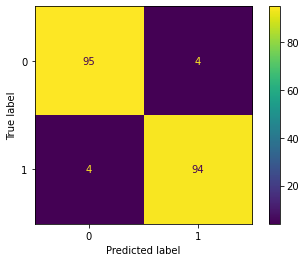

In [830]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_ypreds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
tn, fp, fn, tp = confusion_matrix(y_test, rf_ypreds).ravel()
disp.plot()

In [831]:
TP = tp
TN = tn
FP = fp
FN = fn

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = (TP) / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 * (Recall * Precision)) / (Recall + Precision)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1:", F1)

Accuracy: 0.9593908629441624
Precision: 0.9591836734693877
Recall: 0.9591836734693877
F1: 0.9591836734693877


In [832]:
_predictions_proba = rf.predict_proba(X_test)

F1 Score: 0.9591836734693877
Threshold: 0.5001


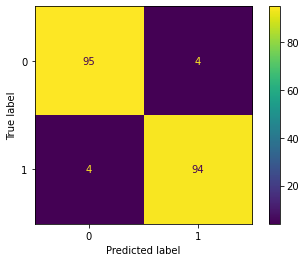

In [833]:
probs = _predictions_proba[:,1]

from numpy import arange
thresholds = arange(0,1, 0.0001)

# evaluate the F score for each of the threhold values
from sklearn.metrics import f1_score

scores = [f1_score(y_test, (probs >= t).astype(int)) for t in thresholds]

# get the best threshold
from numpy import argmax
ix = argmax(scores)

print("F1 Score:", scores[ix])
print("Threshold:", thresholds[ix])

y_pred_with_threshold = (probs >= thresholds[ix]).astype(int)

cm = confusion_matrix(y_test, y_pred_with_threshold)

display = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
display.plot()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_with_threshold).ravel()

In [834]:
TP = tp
TN = tn
FP = fp
FN = fn

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = (TP) / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 * (Recall * Precision)) / (Recall + Precision)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1 Score:", F1)

Accuracy: 0.9593908629441624
Precision: 0.9591836734693877
Recall: 0.9591836734693877
F1 Score: 0.9591836734693877


<div style="color:#fff;
            font-size:13px; 
            font-weight:700; 
            margin-bottom: 10px; 
            background:#000; 
            padding:8px 25px 6px 25px;
            border-top-left-radius:12px; 
            border-top-right-radius:12px; 
            border-bottom:3px solid #000000; 
            -webkit-box-shadow: 0 8px 6px -6px black;
            -moz-box-shadow: 0 8px 6px -6px black;
            box-shadow: 0 8px 6px -6px black;">
    <div style="font-size:15px;">
        The threshold that will maximize the models ability to predict fraudulent transactions</div>
    </div>


In [865]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [866]:
display(Markdown("**The Threshold: " + str(thresholds[ix]) + "**"))

**The Threshold: 0.5001**

In [867]:
display(Markdown("**Precision: " + str(Precision) + "**"))

**Precision: 0.9591836734693877**